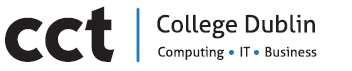


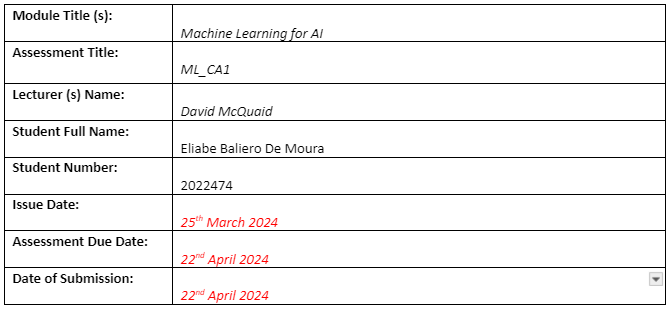

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Checking the log2 file properties

In [53]:
df = pd.read_csv("log2.csv")
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [54]:
df.shape

(65532, 12)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [56]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


# Cleaning Dataset

Cheacking if there is any duplicated row

In [57]:
duplicates = df.duplicated()
print("\nDuplicate Rows:")
print(df[duplicates])


Duplicate Rows:
       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
268          21268             62609                0                     0   
351          48706             23393                0                     0   
593          65003             57470                0                     0   
632            443             49988                0                     0   
661          10669             49756                0                     0   
...            ...               ...              ...                   ...   
65517        54874               445                0                     0   
65519        49784               445                0                     0   
65521        42995             26467                0                     0   
65522        53314             64097                0                     0   
65531        54867               445                0                     0   

       Bytes  Bytes Sent  Bytes Re

Now we can drop the rows that are duplicated, and as we can see the shap of our data went from (65532, 12) to (57170, 12)

In [58]:
df = df.drop_duplicates()
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
...,...,...,...,...,...,...,...,...,...,...,...,...
65526,51710,43069,65147,43069,70,70,0,2,8,2,0,allow
65527,63691,80,13237,80,314,192,122,6,15,4,2,allow
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,allow
65529,54871,445,0,0,70,70,0,1,0,1,0,drop


Checking any null/na in my data

In [59]:
df.isnull().sum()
#df.fillna('')

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encode categorical feature 
df['Action'] = df['Action'].astype('category').cat.codes

# Step 2: Prepare data
X = df.drop(columns=['Action'])  # Features
y = df['Action']  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose a classification algorithm and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9977260801119469
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7430
           1       0.99      0.99      0.99      1615
           2       1.00      1.00      1.00      2381
           3       0.50      0.12      0.20         8

    accuracy                           1.00     11434
   macro avg       0.87      0.78      0.80     11434
weighted avg       1.00      1.00      1.00     11434



In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Data Preprocessing
df = pd.read_csv("log2.csv")
# Encode categorical feature
df['Action'] = df['Action'].astype('category').cat.codes

# Split dataset into features and target variable
X = df.drop(columns=['Action'])
y = df['Action']

# Step 2: Model Selection and Training
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classifier (Random Forest Classifier in this example)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Step 3: Model Evaluation
# Predict on the testing set
y_pred = classifier.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 4: Prediction (Predicting on new data)
# You can use the trained model to predict on new data
# For example:
new_data = pd.DataFrame({
    'Source Port': [57222, 56258],
    'Destination Port': [53, 3389],
    'NAT Source Port': [54587, 56258],
    'NAT Destination Port': [53, 3389],
    'Bytes': [177, 4768],
    'Bytes Sent': [94, 1600],
    'Bytes Received': [83, 3168],
    'Packets': [2, 19],
    'Elapsed Time (sec)': [30, 17],
    'pkts_sent': [1, 10],
    'pkts_received': [1, 9]
})

# Predict the class for new data
new_predictions = classifier.predict(new_data)
class_labels = ['allow', 'deny', 'drop', 'reset-both']
predicted_classes = [class_labels[prediction] for prediction in new_predictions]
print("Predictions for new data:", predicted_classes)


Accuracy: 0.9984740978103304
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7545
           1       1.00      1.00      1.00      2994
           2       1.00      1.00      1.00      2562
           3       1.00      0.67      0.80         6

    accuracy                           1.00     13107
   macro avg       1.00      0.92      0.95     13107
weighted avg       1.00      1.00      1.00     13107

Predictions for new data: ['allow', 'allow']
